In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
%matplotlib inline

In [2]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [43]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [44]:
df_train.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [45]:
df_test.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [46]:
df_train.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [47]:
df_test.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [48]:
#check null values
df_train.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [49]:
df_test.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [50]:
df_train.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

<Axes: ylabel='Distance from Home'>

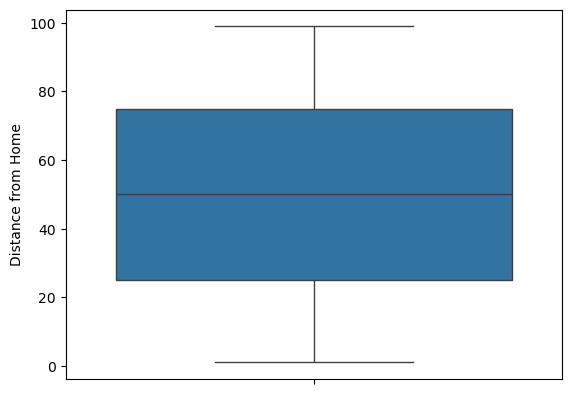

In [51]:
sns.boxplot(df_train["Distance from Home"])

In [52]:
#Calculate InterQuartile Outlier

q1,q3=np.percentile(df_train["Years at Company"],[25,75])
IQR=q3-q1

lower_bound=q1 -(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)

print("Q1 = ",q1)
print("Q3 = ",q3)
print("Median = ", np.median(df_train["Years at Company"]))

print("LOWER BOUND = ",lower_bound)
print("UPPER BOUND = ",upper_bound)

data_clean = [elem for elem in df_train["Years at Company"] if elem>=lower_bound and elem<=upper_bound] 
data_outlier = [elem for elem in df_train["Years at Company"] if elem<lower_bound or elem>upper_bound] 

print("OutLier =",data_outlier)

Q1 =  7.0
Q3 =  23.0
Median =  13.0
LOWER BOUND =  -17.0
UPPER BOUND =  47.0
OutLier = [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 50, 51, 49, 49, 

In [53]:
#imputing Years at Company
new_df_train = pd.DataFrame({"Years at Company": df_train["Years at Company"]})

median=np.median(new_df_train["Years at Company"])

print(median)

new_df_train.loc[(new_df_train["Years at Company"]<lower_bound) | (new_df_train["Years at Company"]>upper_bound), ["Years at Company"]] = median

new_df_train

13.0


,Years at Company
0,19
1,4
2,10
3,7
4,41
...,...
59593,12
59594,4
59595,14
59596,8


In [54]:
#replacing imputed new_df_train["years at company"] to df_train["Years at Company"]
df_train["Years at Company"]=new_df_train["Years at Company"]

In [55]:
df_train.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.589164,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.019224,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,47.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [56]:

#Calculate InterQuartile Outlier in "Monthly Income"

q1,q3=np.percentile(df_train["Monthly Income"],[25,75])
IQR=q3-q1

lower_bound=q1 -(1.5 * IQR)
upper_bound=q3 +(1.5 * IQR)

print("Q1 = ",q1)
print("Q3 = ",q3)
print("Median = ", np.median(df_train["Monthly Income"]))

print("LOWER BOUND = ",lower_bound)
print("UPPER BOUND = ",upper_bound)

data_clean = [elem for elem in df_train["Monthly Income"] if elem>=lower_bound and elem<=upper_bound] 
data_outlier = [elem for elem in df_train["Monthly Income"] if elem<lower_bound or elem>upper_bound] 

print("OutLier =",data_outlier)

Q1 =  5658.0
Q3 =  8880.0
Median =  7354.0
LOWER BOUND =  825.0
UPPER BOUND =  13713.0
OutLier = [15495, 13961, 14014, 14016, 14176, 13962, 14276, 14066, 13876, 14421, 13959, 13722, 13747, 13768, 14622, 13739, 14163, 16149, 13833, 14271, 14235, 13800, 14226, 13988, 14147, 14286, 14885, 13859, 14396, 14210, 13715, 14127, 13793, 14002, 14185, 14076, 14067, 13875, 14398, 14137, 14103, 14924, 13728, 14405, 13877, 15464, 15552, 14839, 14406, 14110]


In [57]:
#imputing Monthly income
new_df_train = pd.DataFrame({"Monthly Income": df_train["Monthly Income"]})

median=np.median(new_df_train["Monthly Income"])

print(median)

new_df_train.loc[(new_df_train["Monthly Income"]<lower_bound) | (new_df_train["Monthly Income"]>upper_bound), ["Monthly Income"]] = median

new_df_train

7354.0


,Monthly Income
0,5390
1,5534
2,8159
3,3989
4,4821
...,...
59593,4414
59594,8040
59595,7944
59596,2931


In [58]:
#replacing imputed monthly income column
df_train["Monthly Income"]=new_df_train["Monthly Income"]

In [59]:
df_train.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.589164,7296.620088,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.019224,2141.990760,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,47.000000,13713.000000,4.000000,99.000000,6.000000,128.000000


<Axes: ylabel='Monthly Income'>

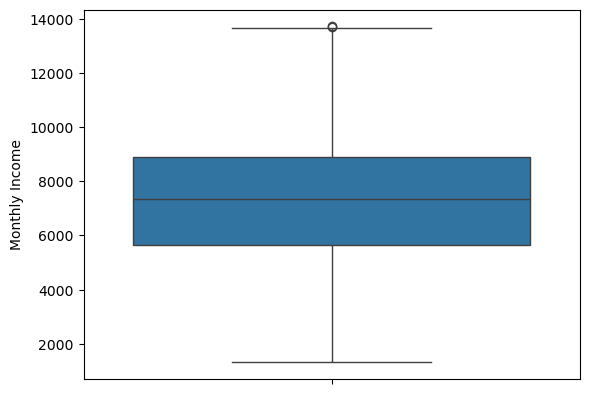

In [60]:
sns.boxplot(df_train["Monthly Income"])

In [61]:
df_train.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.589164,7296.620088,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.019224,2141.990760,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,47.000000,13713.000000,4.000000,99.000000,6.000000,128.000000


In [62]:
#to check class imbalance
res=df_train["Attrition"].value_counts()
res

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

<BarContainer object of 2 artists>

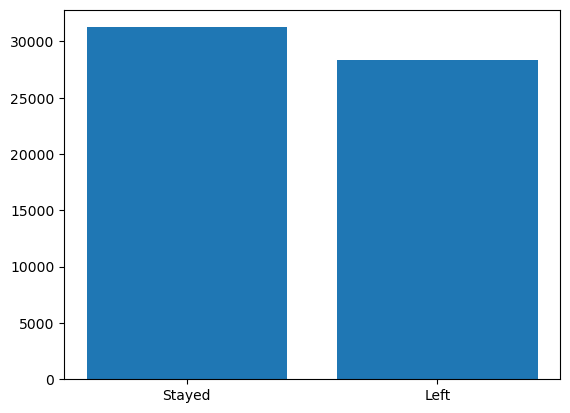

In [63]:
a=["Stayed","Left"]
plt.bar(a,height=res)

In [64]:
#Finding no of Numerical and Categorical COLUMN NAMES
numerical_feats=df_train.dtypes[df_train.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))

categorical_feats=df_train.dtypes[df_train.dtypes == "object"].index
print("# of Categorical features: ", len(categorical_feats))

print(numerical_feats)
print(categorical_feats)

# of Numerical features:  8
# of Categorical features:  16
Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')
Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


<Axes: >

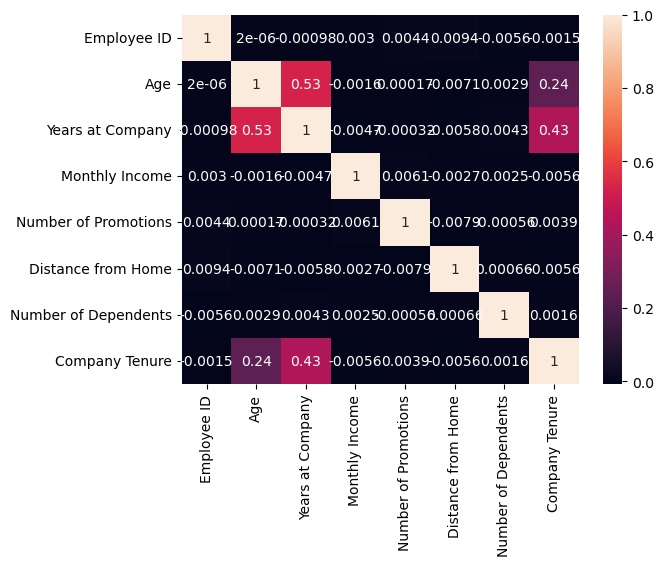

In [65]:
sns.heatmap(df_train[numerical_feats].corr(), annot=True)

In [66]:
!pip install seaborn --upgrade --user

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [90]:
import seaborn
seaborn.__version__

'0.12.2'

In [ ]:
x=df_train[numerical_feats]
x.drop(["Employee ID"], axis=1,inplace=True)
y=df_train["Attrition"].map({"Stayed":1, "Left":0})

In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

In [33]:
model = SVC(C=1)

In [34]:
model.fit(x,y)

SVC(C=1)

In [35]:
x_test=df_test[numerical_feats]
x_test.drop(["Employee ID"], axis=1,inplace=True)
y_test=df_test["Attrition"].map({"Stayed":1,"Left":0})

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
yhat=model.predict(x_test)
confusion_matrix(yhat,y_test)
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69     14900

    accuracy                           0.53     14900
   macro avg       0.50      0.26      0.35     14900
weighted avg       1.00      0.53      0.69     14900

